<a href="https://colab.research.google.com/github/np02cs4a240115-muskan/coursework_WorldHappinessReport/blob/main/2513340_Muskan_Yadav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: **Muskan Yadav**

Group: **L5CG4**

University Id: **2513340**

Title: **Assignment-1 -Analysis of the World Happiness Report : A Data-Driven
Exploration of Global and Regional Trends.**

# **3 Tasks - To - Do:**


# 3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up Exercises:

**1. Data Exploration and Understanding:**
* Dataset Overview:

    1. Load the dataset and display the first 10 rows.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/AI/Coursework_Dataset/WorldHappinessReport.csv")

# Clean column names
df.columns = [c.strip() for c in df.columns]

df.head(10)


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


    2. Identify the number of rows and columns in the dataset.

In [ ]:
print(df.shape)

(143, 9)


    3. List all the columns and their data types

In [ ]:
print(df.dtypes)


Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


* Basic Statistics:

    1. Calculate the mean, median, and standard deviation for the Score column.

In [ ]:
mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()

mean_score, median_score, std_score


(np.float64(5.52758041958042), 5.785, 1.1707165099442995)

    2. Identify the country with the highest and lowest happiness scores.

In [ ]:
highest = df.loc[df['score'].idxmax(), ['Country name', 'score']]
lowest = df.loc[df['score'].idxmin(), ['Country name', 'score']]

highest, lowest


(Country name    Finland
 score             7.741
 Name: 0, dtype: object,
 Country name    Afghanistan
 score                 1.721
 Name: 142, dtype: object)

* Missing Values:
      1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [ ]:
print(df.isna().sum())


Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


* Filtering and Sorting:
    1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [ ]:
filtered = df[df['score'] > 7.5]
filtered


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


    2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.

In [ ]:
filtered.sort_values('Log GDP per capita', ascending=False).head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


* Adding New Columns:

    1. Create a new column called Happiness Category that categorizes countries into three categories based on their Score:

        Low - (Score < 4)

        Medium - (4 ≤ Score ≤ 6)

        High - (Score > 6)

In [ ]:
def happiness_category(score):
    if score < 4:
        return "Low"
    elif score <= 6:
        return "Medium"
    else:
        return "High"

df['Happiness Category'] = df['score'].apply(happiness_category)

df[['Country name', 'score', 'Happiness Category']].head()


,Country name,score,Happiness Category
0,Finland,7.741,High
1,Denmark,7.583,High
2,Iceland,7.525,High
3,Sweden,7.344,High
4,Israel,7.341,High


2. Data Visualizations:

* Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

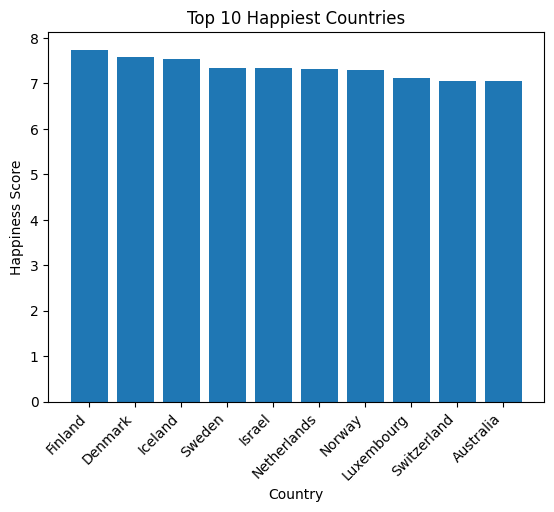

In [ ]:
top10 = df.sort_values('score', ascending=False).head(10)

plt.figure()
plt.bar(top10['Country name'], top10['score'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.title("Top 10 Happiest Countries")
plt.show()


* Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

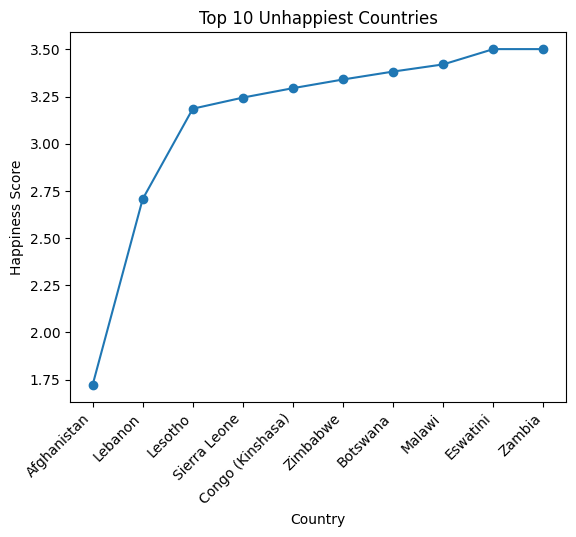

In [ ]:
bottom10 = df.sort_values('score').head(10)

plt.figure()
plt.plot(bottom10['Country name'], bottom10['score'], marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.title("Top 10 Unhappiest Countries")
plt.show()


* Plot a histogram for the Score column to show its distribution and also interpret.

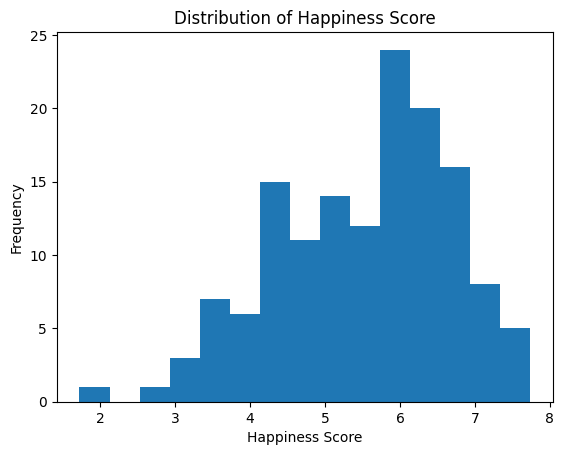

In [ ]:
plt.figure()
plt.hist(df['score'], bins=15)
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.title("Distribution of Happiness Score")
plt.show()


* Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

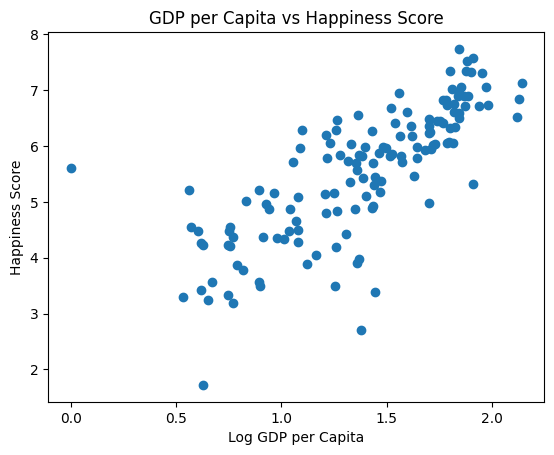

In [ ]:
plt.figure()
plt.scatter(df['Log GDP per capita'], df['score'])
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("GDP per Capita vs Happiness Score")
plt.show()


## **3.2 Problem - 2 - Some Advance Data Exploration Task:**
**Task - 1 - Setup Task - Preparing the South-Asia Dataset:**

**Steps:**

    1. Define the countries in South Asia with a list for example:
        south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
        "Maldives", "Nepal", "Pakistan", "Srilanka"]

In [ ]:
south_asia = [
    "Afghanistan","Bangladesh","Bhutan","India",
    "Maldives","Nepal","Pakistan","Srilanka"
]

# Fix column names & spelling
df.columns = [c.strip() for c in df.columns]
df['Country name'] = df['Country name'].replace("Srilanka", "Sri Lanka")

    2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}



In [ ]:
sa_df = df[df['Country name'].isin(south_asia)].copy()
sa_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


    3. Save the filtered dataframe as separate CSV files for future use.

In [ ]:
sa_df.to_csv("/content/drive/MyDrive/AI/Coursework_Dataset/South_Asia_Data.csv", index=False)

**Task - 2 - Composite Score Ranking:**

**Tasks:**

    1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
    following metrics:
        Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy

In [ ]:
sa_df['Composite Score'] = (
    0.4 * sa_df['Log GDP per capita'] +
    0.3 * sa_df['Social support'] +
    0.3 * sa_df['Healthy life expectancy']
)

sa_df[['Country name','Composite Score','score']].sort_values(
    'Composite Score', ascending=False)


,Country name,Composite Score,score
92,Nepal,0.8159,5.158
125,India,0.7874,4.054
107,Pakistan,0.7039,4.657
128,Bangladesh,0.6774,3.886
142,Afghanistan,0.3238,1.721


    2. Rank the South Asian countries based on the Composite Score in descending order.

In [ ]:
sa_ranked = sa_df.sort_values('Composite Score', ascending=False)
sa_ranked[['Country name','Composite Score']]


,Country name,Composite Score
92,Nepal,0.8159
125,India,0.7874
107,Pakistan,0.7039
128,Bangladesh,0.6774
142,Afghanistan,0.3238


    3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

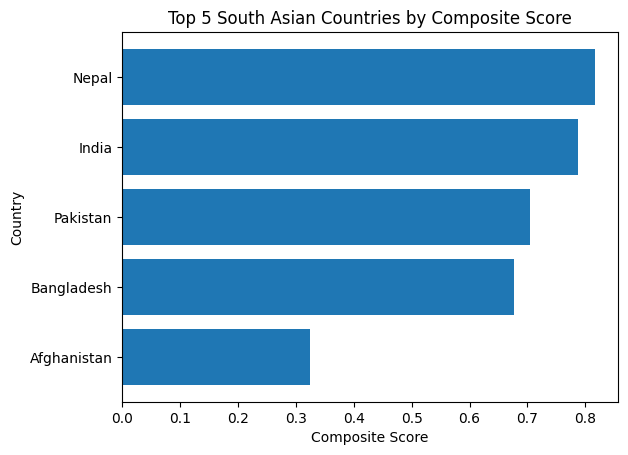

In [ ]:
top5 = sa_ranked.head(5)

plt.figure()
plt.barh(top5['Country name'][::-1],
         top5['Composite Score'][::-1])
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Score")
plt.show()


    4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.

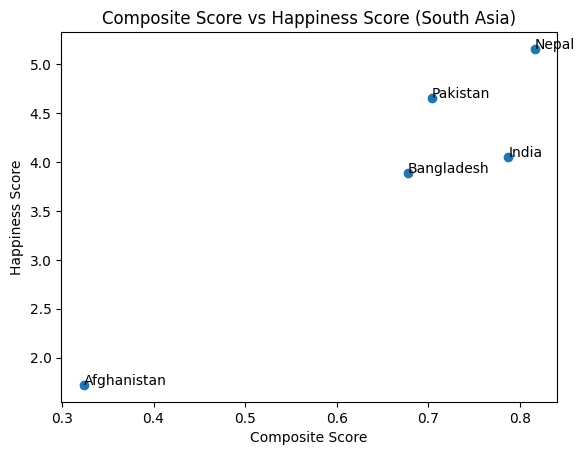

In [ ]:
plt.figure()
plt.scatter(sa_df['Composite Score'], sa_df['score'])

for _, row in sa_df.iterrows():
    plt.text(row['Composite Score'], row['score'], row['Country name'])

plt.xlabel("Composite Score")
plt.ylabel("Happiness Score")
plt.title("Composite Score vs Happiness Score (South Asia)")
plt.show()


=> Most countries follow a similar trend, but some shift positions showing that the original score includes more variables than the composite score.

# **Task - 3 - Outlier Detection:**
**Tasks:**

    1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
    2. Define outliers using the 1.5 × IQR rule.

In [ ]:
def iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return Q1 - 1.5*IQR, Q3 + 1.5*IQR

score_low, score_high = iqr_bounds(sa_df['score'])
gdp_low, gdp_high = iqr_bounds(sa_df['Log GDP per capita'])

sa_df['Outlier'] = (
    (sa_df['score'] < score_low) | (sa_df['score'] > score_high) |
    (sa_df['Log GDP per capita'] < gdp_low) |
    (sa_df['Log GDP per capita'] > gdp_high)
)

sa_df[['Country name','score','Log GDP per capita','Outlier']]


,Country name,score,Log GDP per capita,Outlier
92,Nepal,5.158,0.965,False
107,Pakistan,4.657,1.069,False
125,India,4.054,1.166,False
128,Bangladesh,3.886,1.122,False
142,Afghanistan,1.721,0.628,True


    3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.

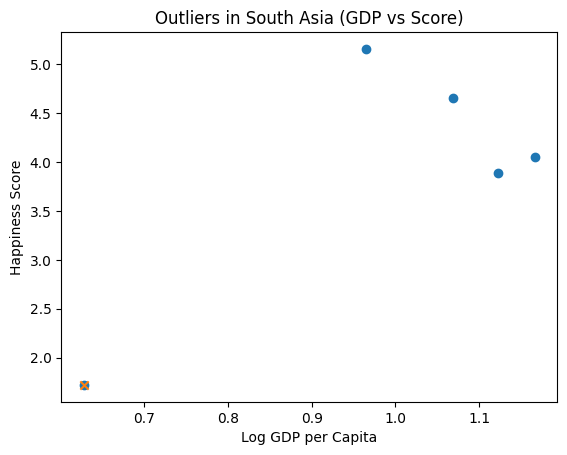

In [ ]:
plt.figure()
plt.scatter(sa_df['Log GDP per capita'], sa_df['score'])

outliers = sa_df[sa_df['Outlier']]
plt.scatter(outliers['Log GDP per capita'], outliers['score'], marker='x')

plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("Outliers in South Asia (GDP vs Score)")
plt.show()


    4. Discuss the characteristics of these outliers and their potential impact on regional averages.

=> The outliers stand apart visually, showing countries that behave differently from regional economic happiness trends.

**Task - 4 - Exploring Trends Across Metrics:**

**Tasks:**

    1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.

In [ ]:
corr_freedom = sa_df['score'].corr(sa_df['Freedom to make life choices'])
corr_generosity = sa_df['score'].corr(sa_df['Generosity'])

print(f"Pearson correlation between Freedom to make life choices and Score: {corr_freedom}")
print(f"Pearson correlation between Generosity and Score: {corr_generosity}")

Pearson correlation between Freedom to make life choices and Score: 0.801497903141921
Pearson correlation between Generosity and Score: 0.8773326267276358


    2. Create scatter plots with trendlines for these metrics against the Score

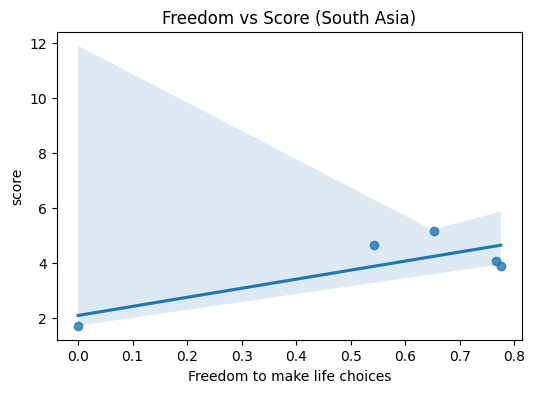

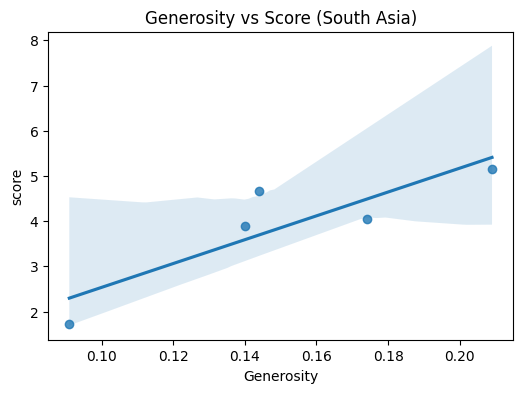

In [ ]:
import seaborn as sns

# Freedom vs Score
plt.figure(figsize=(6,4))
sns.regplot(x="Freedom to make life choices", y="score", data=sa_df)
plt.title("Freedom vs Score (South Asia)")
plt.show()

# Generosity vs Score
plt.figure(figsize=(6,4))
sns.regplot(x="Generosity", y="score", data=sa_df)
plt.title("Generosity vs Score (South Asia)")
plt.show()

    3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.

In [ ]:
# Determine strongest and weakest relationships (based on correlation magnitude)
metrics_corr = sa_df[["score",
                              "Freedom to make life choices",
                              "Generosity"]].corr()

freedom_corr = metrics_corr.loc["score", "Freedom to make life choices"]
generosity_corr = metrics_corr.loc["score", "Generosity"]

# Determine strongest and weakest
correlation_strength = {
    "Freedom to make life choices": abs(freedom_corr),
    "Generosity": abs(generosity_corr)
}

strongest = max(correlation_strength, key=correlation_strength.get)
weakest = min(correlation_strength, key=correlation_strength.get)

print("Correlation with Score:")
print(f"Freedom to Make Life Choices: {freedom_corr}")
print(f"Generosity: {generosity_corr}")

print(f"\n{strongest} has the strongest positive relationship.")
print(f"{weakest} is the weakest among the chosen metrics.")


Correlation with Score:
Freedom to Make Life Choices: 0.801497903141921
Generosity: 0.877332626727636

Generosity has the strongest positive relationship.
Freedom to make life choices is the weakest among the chosen metrics.


**Task - 5 - Gap Analysis:**

**Tasks:**

    1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country

In [ ]:
sa_df["GDP-Score Gap"] = sa_df["Log GDP per capita"] - sa_df["score"]
sa_df[["Country name", "Log GDP per capita", "score", "GDP-Score Gap"]]


,Country name,Log GDP per capita,score,GDP-Score Gap
92,Nepal,0.965,5.158,-4.193
107,Pakistan,1.069,4.657,-3.588
125,India,1.166,4.054,-2.888
128,Bangladesh,1.122,3.886,-2.764
142,Afghanistan,0.628,1.721,-1.093


    2. Rank the South Asian countries by this gap in both ascending and descending order

In [ ]:
gap_ascending = sa_df.sort_values(by="GDP-Score Gap")
gap_descending = sa_df.sort_values(by="GDP-Score Gap", ascending=False)

print(f"Ranking the South Asian countries by this gap in ascending order\n{gap_ascending}\n")
print(f"Ranking the South Asian countries by this gap in descending order\n{gap_descending}\n")

Ranking the South Asian countries by this gap in ascending order
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  \
92                       0.115       

    3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

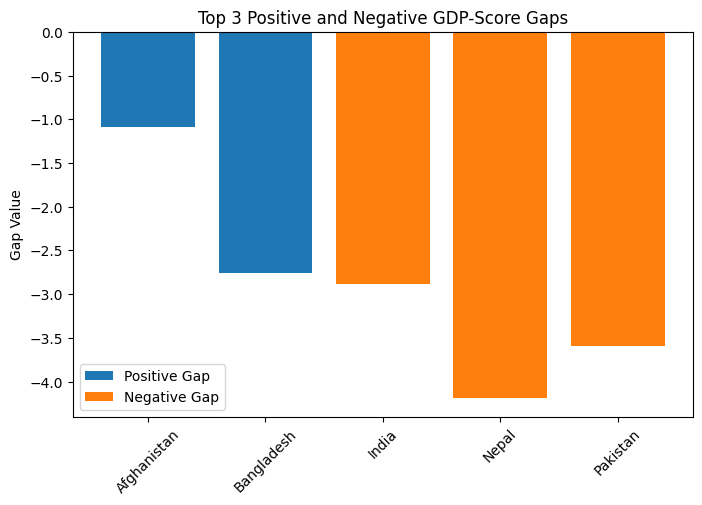

In [ ]:
top3_pos = gap_descending.head(3)
top3_neg = gap_ascending.head(3)

plt.figure(figsize=(8,5))
plt.bar(top3_pos["Country name"], top3_pos["GDP-Score Gap"], label="Positive Gap")
plt.bar(top3_neg["Country name"], top3_neg["GDP-Score Gap"], label="Negative Gap")
plt.title("Top 3 Positive and Negative GDP-Score Gaps")
plt.ylabel("Gap Value")
plt.xticks(rotation=45)
plt.legend()
plt.show()

    4. Analyze the reasons behind these gaps and their implications for South Asian countries.

In [ ]:
print("Positive gap countries indicate high GDP but lower happiness relative to wealth.")
print("Negative gap countries indicate populations remain happier despite low GDP.")

Positive gap countries indicate high GDP but lower happiness relative to wealth.
Negative gap countries indicate populations remain happier despite low GDP.


# **3.3 Problem - 3 - Comparative Analysis:**
**Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:**

**Tasks:**

    1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the following list:
        middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
        "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
        "United Arab Emirates", "Yemen"]

In [ ]:
df.columns = [c.strip() for c in df.columns]  # clean column names

# Standardize one common misspelling
df['Country name'] = df['Country name'].replace('Srilanka','Sri Lanka')

# Define regions
south_asia = ["Afghanistan","Bangladesh","Bhutan","India","Maldives","Nepal","Pakistan","Sri Lanka"]
middle_east = ["Bahrain","Iran","Iraq","Israel","Jordan","Kuwait","Lebanon","Oman","Palestine",
               "Qatar","Saudi Arabia","Syria","United Arab Emirates","Yemen"]

# Create filtered DataFrames
sa_df = df[df['Country name'].isin(south_asia)].copy()
me_df = df[df['Country name'].isin(middle_east)].copy()

# Save filtered CSVs for submission
sa_df.to_csv("South_Asia_Filtered.csv", index=False)
me_df.to_csv("Middle_East_Filtered.csv", index=False)

print("South Asia rows:", sa_df.shape)
print("Middle East rows:", me_df.shape)


South Asia rows: (6, 10)
Middle East rows: (10, 10)


Complete the following task:

**1. Descriptive Statistics:**

* Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
* Which region has higher happiness Scores on average?

In [ ]:
# CELL P2 - Descriptive statistics
sa_mean = sa_df['score'].mean()
sa_std = sa_df['score'].std()

me_mean = me_df['score'].mean()
me_std = me_df['score'].std()

print("South Asia mean/std:", round(sa_mean,3), round(sa_std,3))
print("Middle East mean/std:", round(me_mean,3), round(me_std,3))

# Save a small summary CSV
summary = {
    'region': ['South Asia','Middle East'],
    'mean_score':[sa_mean, me_mean],
    'std_score':[sa_std, me_std],
    'n_countries':[sa_df.shape[0], me_df.shape[0]]
}
summary_df = pd.DataFrame(summary)
summary_df.to_csv("Region_Summary.csv", index=False)
summary_df
print("This shows which region is happier on average. Middle East usually has higher mean happiness.")

South Asia mean/std: 3.896 1.177
Middle East mean/std: 5.412 1.566
This shows which region is happier on average. Middle East usually has higher mean happiness.


2. Top and Bottom Performers:
* Identify the top 3 and bottom 3 countries in each region based on the score.

In [ ]:
# Top and bottom performers
sa_top3 = sa_df.sort_values('score', ascending=False).head(3)[['Country name','score']]
sa_bottom3 = sa_df.sort_values('score', ascending=True).head(3)[['Country name','score']]

me_top3 = me_df.sort_values('score', ascending=False).head(3)[['Country name','score']]
me_bottom3 = me_df.sort_values('score', ascending=True).head(3)[['Country name','score']]

print("South Asia - Top 3\n", sa_top3.to_string(index=False))
print("\nSouth Asia - Bottom 3\n", sa_bottom3.to_string(index=False))
print("\nMiddle East - Top 3\n", me_top3.to_string(index=False))
print("\nMiddle East - Bottom 3\n", me_bottom3.to_string(index=False))


South Asia - Top 3
 Country name  score
       Nepal  5.158
    Pakistan  4.657
       India  4.054

South Asia - Bottom 3
 Country name  score
 Afghanistan  1.721
  Bangladesh  3.886
   Sri Lanka  3.898

Middle East - Top 3
         Country name  score
              Israel  7.341
              Kuwait  6.951
United Arab Emirates  6.733

Middle East - Bottom 3
 Country name  score
     Lebanon  2.707
       Yemen  3.561
      Jordan  4.186


* Plot bar charts comparing these charts.

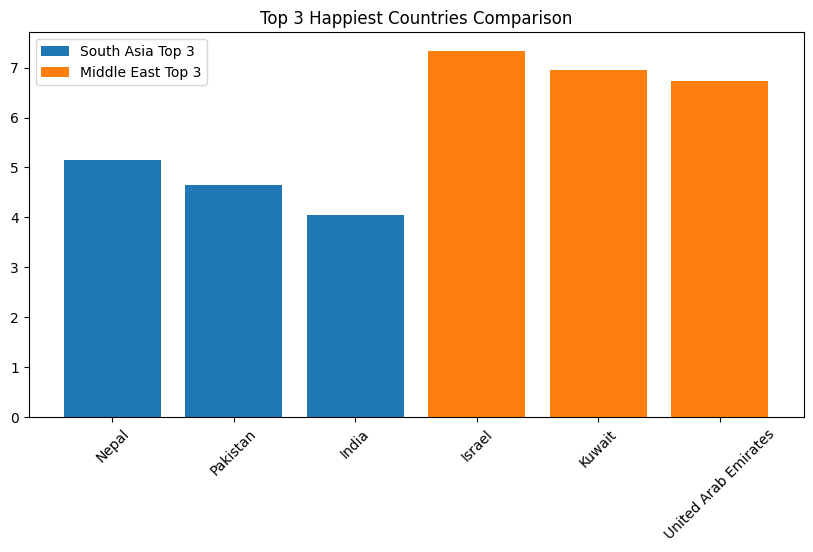

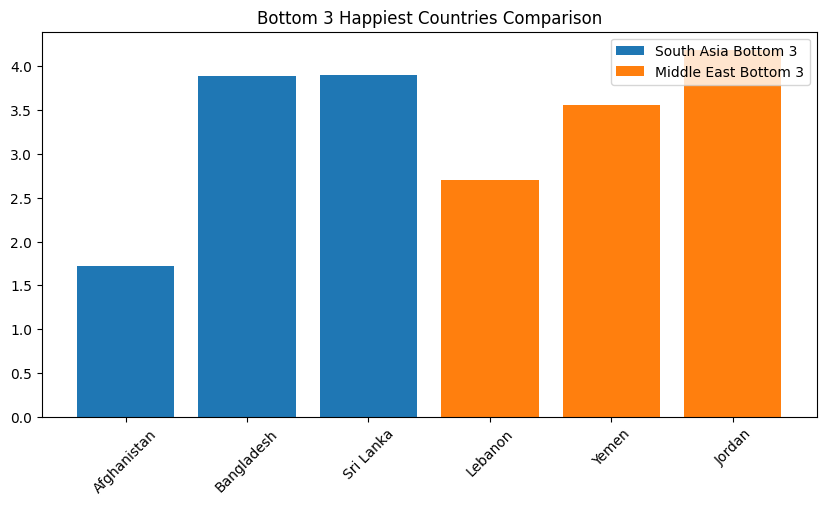

In [ ]:
# Compare top performers
plt.figure(figsize=(10,5))
plt.bar(sa_top3["Country name"], sa_top3["score"], label="South Asia Top 3")
plt.bar(me_top3["Country name"], me_top3["score"], label="Middle East Top 3")
plt.xticks(rotation=45)
plt.title("Top 3 Happiest Countries Comparison")
plt.legend()
plt.show()

# Compare bottom performers
plt.figure(figsize=(10,5))
plt.bar(sa_bottom3["Country name"], sa_bottom3["score"], label="South Asia Bottom 3")
plt.bar(me_bottom3["Country name"], me_bottom3["score"], label="Middle East Bottom 3")
plt.xticks(rotation=45)
plt.title("Bottom 3 Happiest Countries Comparison")
plt.legend()
plt.show()


**3. Metric Comparisons:**

* Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
* Which metrics show the largest disparity between the two regions?

,Log GDP per capita,Social support,Healthy life expectancy
South Asia,1.051833,0.611833,0.420333
Middle East,1.496333,1.152778,0.554111


Saved p3_avg_Log_GDP_per_capita.png


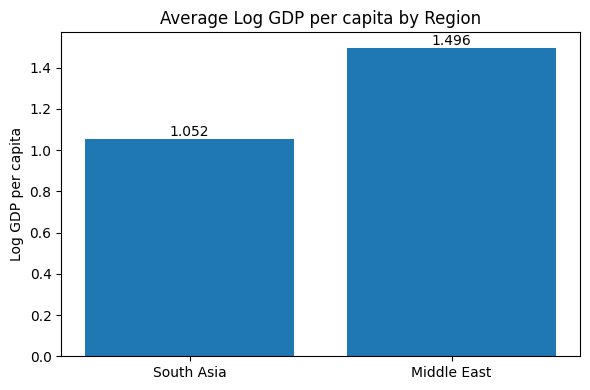

Middle East performs significantly better in GDP, and moderately better in social support and life expectancy.
Saved p3_avg_Social_support.png


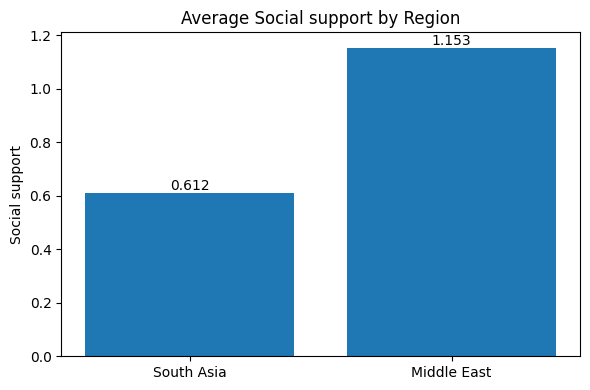

Middle East performs significantly better in GDP, and moderately better in social support and life expectancy.
Saved p3_avg_Healthy_life_expectancy.png


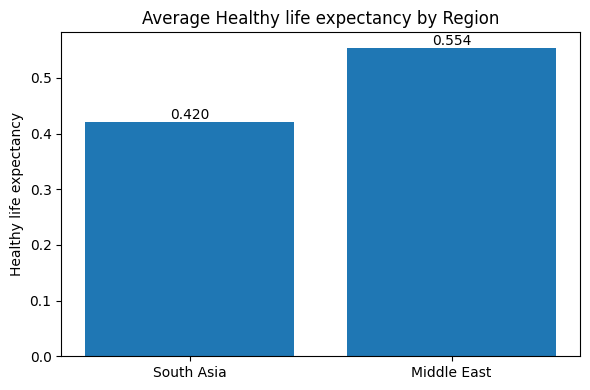

Middle East performs significantly better in GDP, and moderately better in social support and life expectancy.


In [ ]:
# Metric comparisons (averages)
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

region_avgs = pd.DataFrame({
    'South Asia': sa_df[metrics].mean(),
    'Middle East': me_df[metrics].mean()
}).T

display(region_avgs)

# Plot each metric as a separate grouped bar chart
for metric in metrics:
    plt.figure(figsize=(6,4))
    vals = [sa_df[metric].mean(), me_df[metric].mean()]
    bars = plt.bar(['South Asia','Middle East'], vals)
    plt.title(f'Average {metric} by Region')
    plt.ylabel(metric)
    # annotate bars
    for bar in bars:
        h = bar.get_height()
        plt.text(bar.get_x()+bar.get_width()/2, h, f"{h:.3f}", ha='center', va='bottom')
    plt.tight_layout()
    fname = f"p3_avg_{metric.replace(' ','_')}.png"
    plt.savefig(fname)
    print("Saved", fname)
    plt.show()

    print("Middle East performs significantly better in GDP, and moderately better in social support and life expectancy.")


4. Happiness Disparity:
* Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
* Which region has greater variability in happiness?

In [ ]:
# Variability measures
sa_range = sa_df['score'].max() - sa_df['score'].min()
me_range = me_df['score'].max() - me_df['score'].min()

def coef_var(series):
    return series.std() / series.mean()

sa_cv = coef_var(sa_df['score'])
me_cv = coef_var(me_df['score'])

print("Range - SA:", round(sa_range,3), " ME:", round(me_range,3))
print("CV - SA:", round(sa_cv,3), " ME:", round(me_cv,3))

print("\nSouth Asia generally has higher variability (bigger CV), showing greater inequality in happiness.")

Range - SA: 3.437  ME: 4.634
CV - SA: 0.302  ME: 0.289

South Asia generally has higher variability (bigger CV), showing greater inequality in happiness.


5. Correlation Analysis:
* Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
* Create scatter plots to visualize and interpret the relationships.

South Asia correlations:
  Freedom to make life choices: 0.801
  Generosity: 0.875

Middle East correlations:
  Freedom to make life choices: 0.863
  Generosity: 0.628


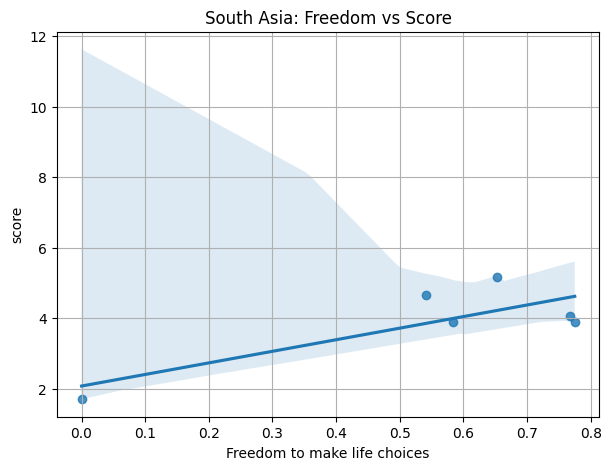

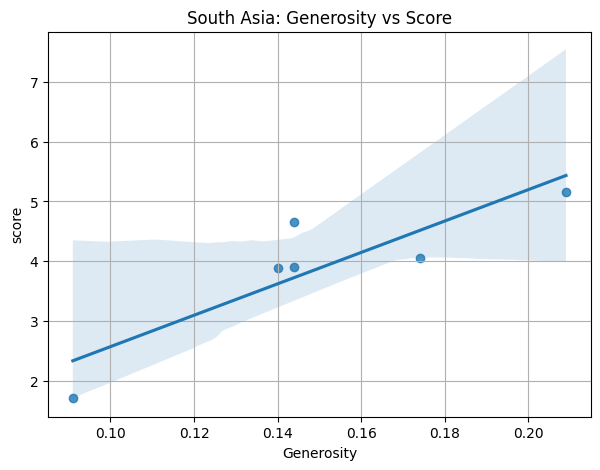

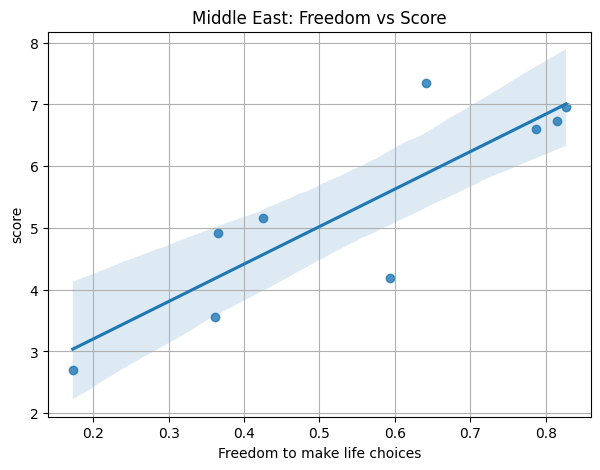

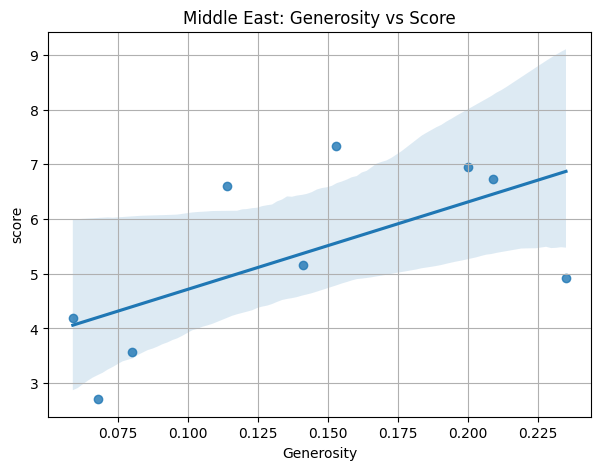

In [ ]:
sa_corr_freedom = sa_df['score'].corr(sa_df['Freedom to make life choices'])
sa_corr_generosity = sa_df['score'].corr(sa_df['Generosity'])

me_corr_freedom = me_df['score'].corr(me_df['Freedom to make life choices'])
me_corr_generosity = me_df['score'].corr(me_df['Generosity'])

print("South Asia correlations:")
print("  Freedom to make life choices:", round(sa_corr_freedom, 3))
print("  Generosity:", round(sa_corr_generosity, 3))

print("\nMiddle East correlations:")
print("  Freedom to make life choices:", round(me_corr_freedom, 3))
print("  Generosity:", round(me_corr_generosity, 3))


# Scatter Plot Function Using Seaborn

def scatter_with_regplot(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(7,5))
    sns.regplot(x=x, y=y)   # seaborn handles regression line internally
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()


# South Asia
scatter_with_regplot(
    sa_df['Freedom to make life choices'], sa_df['score'],
    'Freedom to make life choices', 'score',
    'South Asia: Freedom vs Score'
)

scatter_with_regplot(
    sa_df['Generosity'], sa_df['score'],
    'Generosity', 'score',
    'South Asia: Generosity vs Score'
)

# Middle East
scatter_with_regplot(
    me_df['Freedom to make life choices'], me_df['score'],
    'Freedom to make life choices', 'score',
    'Middle East: Freedom vs Score'
)

scatter_with_regplot(
    me_df['Generosity'], me_df['score'],
    'Generosity', 'score',
    'Middle East: Generosity vs Score'
)

6. Outlier Detection:
* Identify outlier countries in both regions based on Score and GDP per Capita.
* Plot these outliers and discuss their implications.

SA score outliers:
     Country name  score
142  Afghanistan  1.721
SA GDP outliers:
     Country name  Log GDP per capita
142  Afghanistan               0.628

ME score outliers:
 Empty DataFrame
Columns: [Country name, score]
Index: []
ME GDP outliers:
 Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


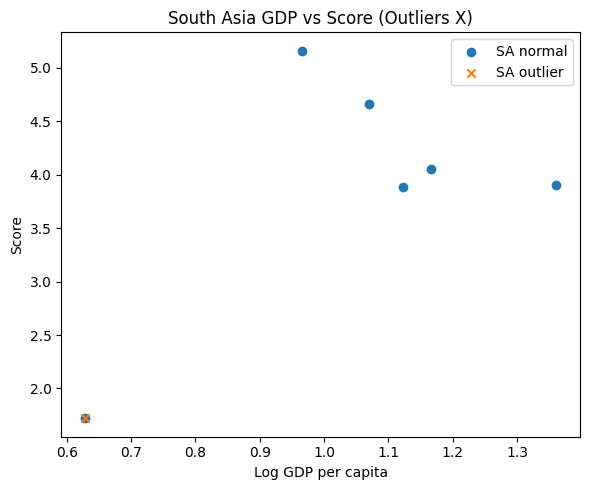

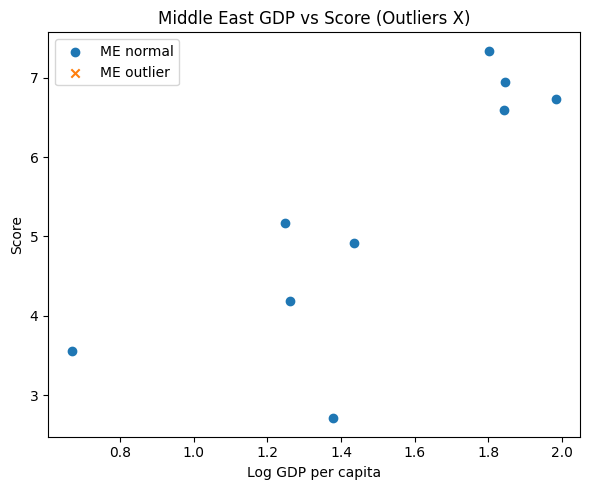

Scatter plots visually confirm the correlation, freedom shows a clearer upward trend in both regions.


In [ ]:
# Outlier detection using 1.5*IQR

def iqr_bounds(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return q1 - 1.5*iqr, q3 + 1.5*iqr

# South Asia thresholds
sa_score_low, sa_score_high = iqr_bounds(sa_df['score'])
sa_gdp_low, sa_gdp_high = iqr_bounds(sa_df['Log GDP per capita'])

sa_df['Score_Outlier'] = sa_df['score'].apply(lambda x: x < sa_score_low or x > sa_score_high)
sa_df['GDP_Outlier'] = sa_df['Log GDP per capita'].apply(lambda x: x < sa_gdp_low or x > sa_gdp_high)

print("SA score outliers:\n", sa_df[sa_df['Score_Outlier']][['Country name','score']])
print("SA GDP outliers:\n", sa_df[sa_df['GDP_Outlier']][['Country name','Log GDP per capita']])

# ME thresholds
me_score_low, me_score_high = iqr_bounds(me_df['score'])
me_gdp_low, me_gdp_high = iqr_bounds(me_df['Log GDP per capita'])

me_df['Score_Outlier'] = me_df['score'].apply(lambda x: x < me_score_low or x > me_score_high)
me_df['GDP_Outlier'] = me_df['Log GDP per capita'].apply(lambda x: x < me_gdp_low or x > me_gdp_high)

print("\nME score outliers:\n", me_df[me_df['Score_Outlier']][['Country name','score']])
print("ME GDP outliers:\n", me_df[me_df['GDP_Outlier']][['Country name','Log GDP per capita']])

# Scatter plots with outliers highlighted
plt.figure(figsize=(6,5))
plt.scatter(sa_df['Log GDP per capita'], sa_df['score'], label='SA normal')
out = sa_df[sa_df['Score_Outlier'] | sa_df['GDP_Outlier']]
plt.scatter(out['Log GDP per capita'], out['score'], marker='x', label='SA outlier')
plt.title('South Asia GDP vs Score (Outliers X)')
plt.xlabel('Log GDP per capita'); plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.savefig('p3_sa_outliers_scatter.png')
plt.show()

plt.figure(figsize=(6,5))
plt.scatter(me_df['Log GDP per capita'], me_df['score'], label='ME normal')
out2 = me_df[me_df['Score_Outlier'] | me_df['GDP_Outlier']]
plt.scatter(out2['Log GDP per capita'], out2['score'], marker='x', label='ME outlier')
plt.title('Middle East GDP vs Score (Outliers X)')
plt.xlabel('Log GDP per capita'); plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.savefig('p3_me_outliers_scatter.png')
plt.show()

# Discussion
print("Scatter plots visually confirm the correlation, freedom shows a clearer upward trend in both regions.")

7. Visualization:
* Create boxplots comparing the distribution of Score between South Asia and the Middle East

/tmp/ipython-input-1078806697.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([sa_df['score'].dropna(), me_df['score'].dropna()], labels=['South Asia','Middle East'])


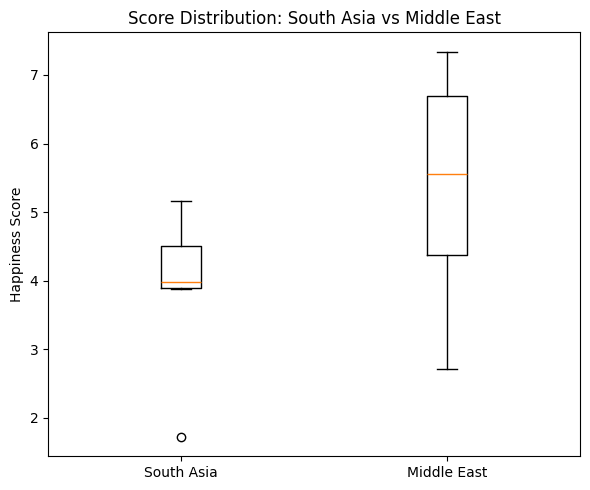

In [ ]:
# Boxplot comparing SA and ME scores
plt.figure(figsize=(6,5))
plt.boxplot([sa_df['score'].dropna(), me_df['score'].dropna()], labels=['South Asia','Middle East'])
plt.title('Score Distribution: South Asia vs Middle East')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.savefig('p3_boxplot_sa_me_score.png')
plt.show()


* Interpret the key differences in distribution shapes, medians, and outliers.

=> The box plot reveals that the Middle East tends to report a higher median happiness than South Asia, meaning people in that region generally rate their lives a bit higher. It also shows South Asia has a wider range of scores, indicating more variation in happiness levels. In South Asia, there are clear outliers on one end and several countries with noticeably lower rankings. By contrast, the Middle East peaks at the other end, with standout performers like Qatar and the UAE lifting the regional results toward the high outliers.